<a href="https://colab.research.google.com/github/KireniaMaytin/Python/blob/main/python_foodhub_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Python Foundations: FoodHub Data Analysis**

### **Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### **Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### **Data Description**

The data contains the different data related to a food order. The detailed data dictionary is given below.

### **Data Dictionary**

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **importing the required libraries**


In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# command to display graphs
%matplotlib inline

In [ ]:
# import foodhub_order.csv file as dataset
from google.colab import files
uploaded = files.upload()

Saving foodhub_order.csv to foodhub_order.csv


### **Understanding the structure of the data**

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Observations:**

*   The data frame has 9 columns as mentioned in the data dictionary.
*   Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# checking number of rows and columns in a dataset
df.shape

(1898, 9)

#### **Observations:**

*  There are 1,898 rows and 9 columns in the dataframe.
*  Each column represents order information such as order id, customer id, restaurant name, cuisine type, order costs, days of the week, rating, food preparation time, and delivery time.
*  Every row corresponds with the orders made by the customers.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# using info() to print a concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**

*   There are 5 numerical datatypes and 4 categorical datatypes.
*   The order_id and customer_id are read as numerical variables but should be categorical variables. Both are unique identifiers of orders and customers.
*   The rating datatype is read as a categorical variable but should be a numerical variable.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# acquiring the missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### **Observations:**

* There are no missing values in the data. Hence, no treatment is required.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# providing a statistical summary of the numerical columns in the data frame
# transposing data to switch columns and rows within the data frame
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### **Observations:**
* The data has 1898 total values.
* There is a positive correlation between the cost of the order and the food preparation time, meaning as the cost increases, the preparation time also increases.
* There is a negative correlation between the cost of the order and the delivery time, implying that as the cost increases, the delivery time decreases.
* The food preparation time and delivery time are negatively correlated, suggesting that when the preparation time is longer, the delivery time tends to be shorter.
* The minimum food preparation time for all orders is 20 minutes, while the average food preparation time is 27.37 minutes. The maximum food preparation time for all orders is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# checking what specific ratings are present in the data
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# counting how many datapoints had a certain value within the 'rating' column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# fetching the rows from the 'rating' column with solely 'Not given' values
# counting the unique total values within the subset
df[df['rating'] == 'Not given']['rating'].value_counts()

Not given    736
Name: rating, dtype: int64

In [ ]:
# calculating the percentages breakdown from the 'rating' column
# rounding to 2 decimal places
round(df['rating'].value_counts(normalize = True), 2)

Not given    0.39
5            0.31
4            0.20
3            0.10
Name: rating, dtype: float64

#### **Observations:**

*   There are 736 orders with no rating as shown in the 'not given'
  category.
*   Approximately 39% of orders are not rated.





### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# creating data plots
plt.style.use('ggplot')

### **Order ID**

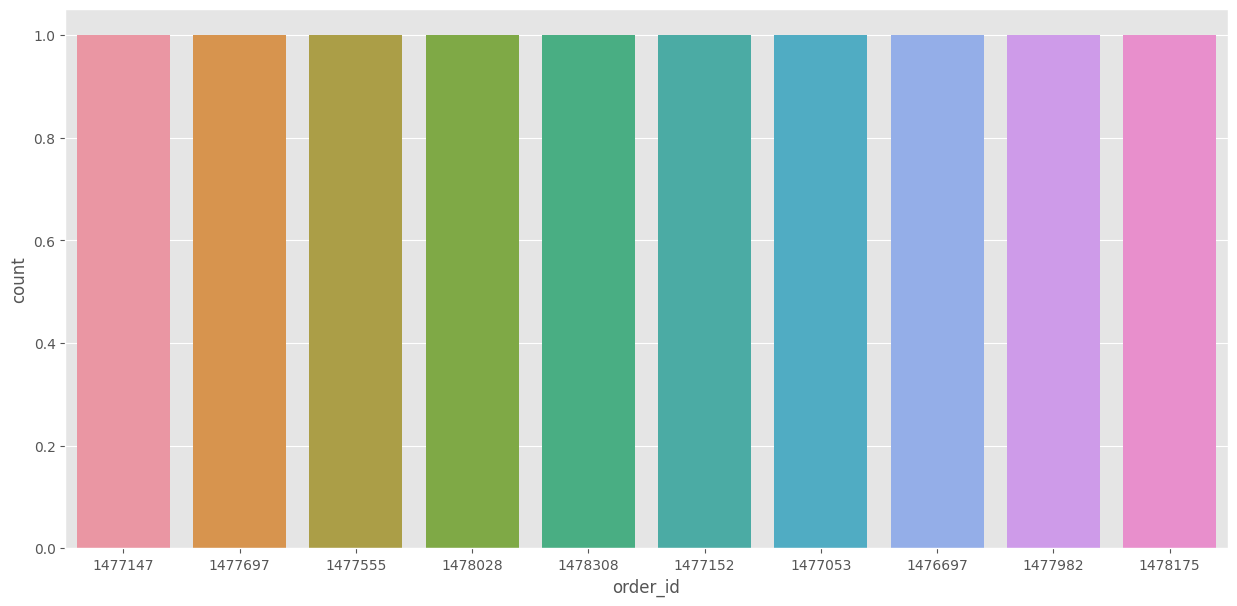

In [ ]:
# creating a bar chart to demonstrate 'order_id' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'order_id', order = df.order_id.value_counts().iloc[:10].index);

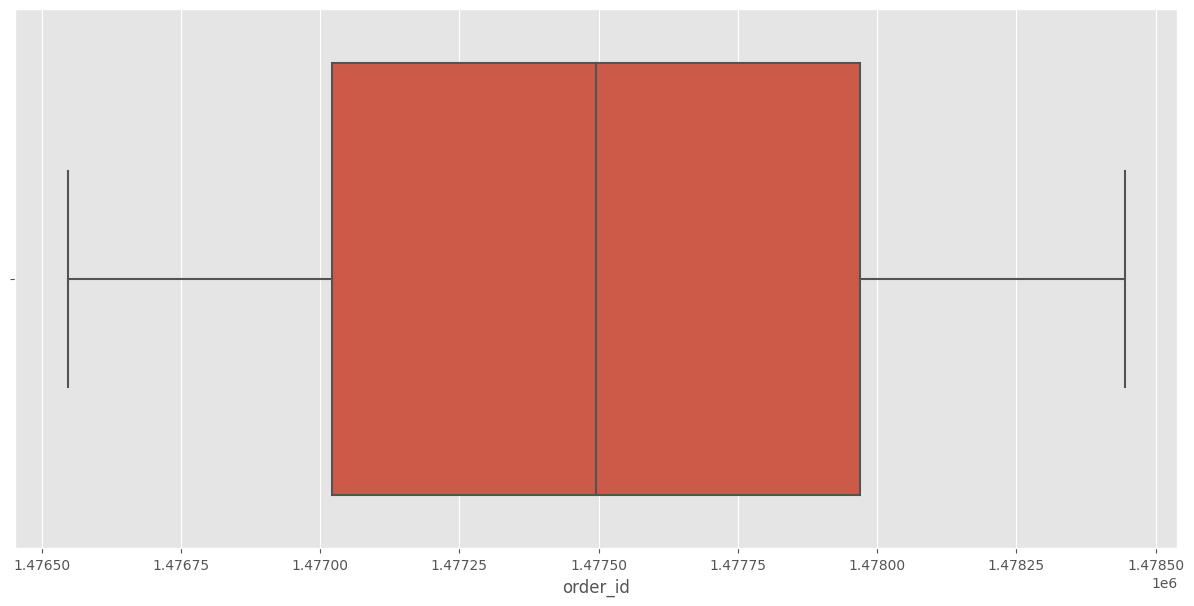

In [ ]:
# creating a boxplot for analyzing distribution
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = 'order_id');

#### **Observations:**

*   Order_ids are united by the unique id beginning with 147 per order_id shown.
*   The boxplot has no skew with the median being approximately 1.47749.


### **Customer ID**

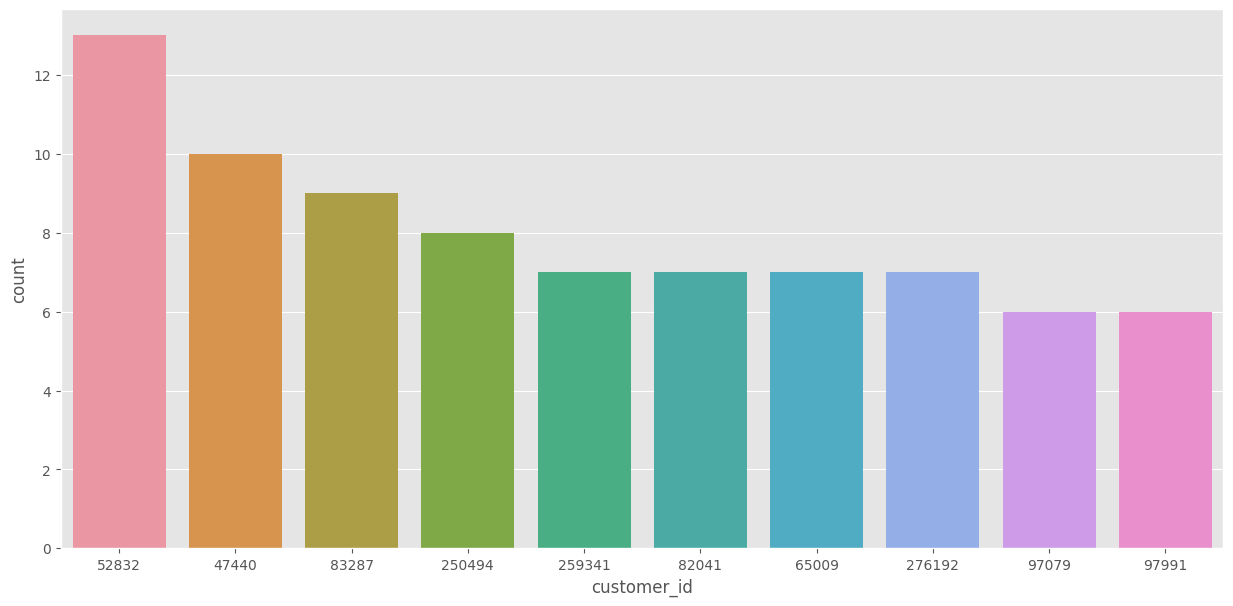

In [ ]:
# creating a bar chart to demonstrate 'customer_id' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'customer_id', order = df.customer_id.value_counts().iloc[:10].index);

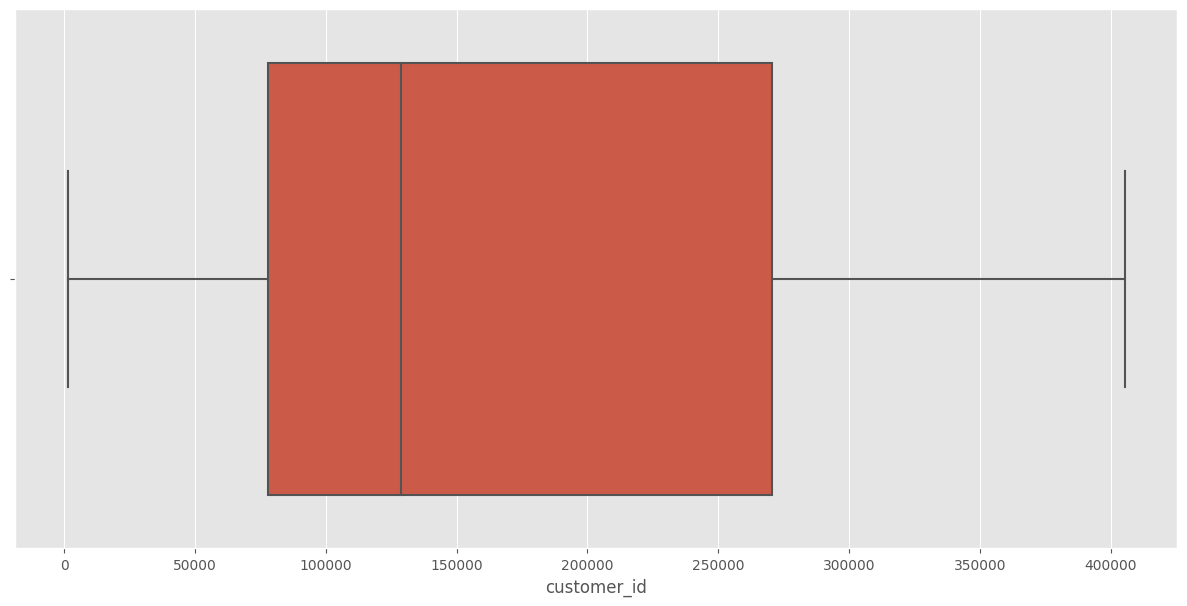

In [ ]:
# creating a boxplot for analyzing distribution
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = 'customer_id');

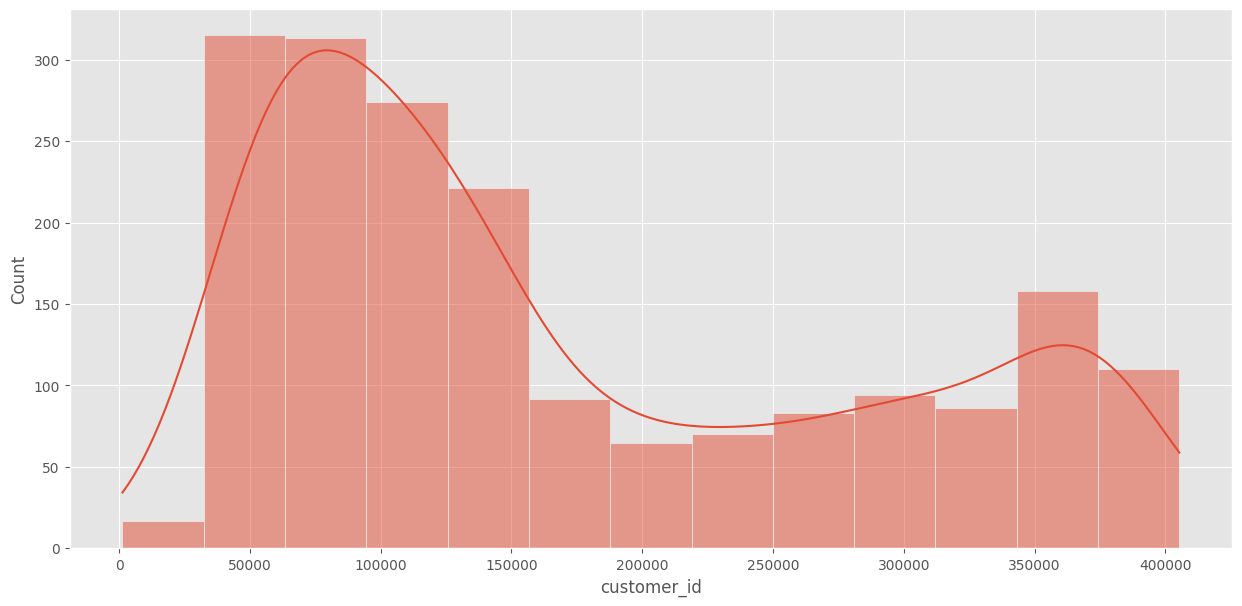

In [ ]:
# creating a histogram for analyzing distribution
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'customer_id', kde = True);

#### **Observations:**

*   Customer_ids range from approximately 1 to 425,000.
*   The boxplot is right skewed at approximately 125,000.
*   The histogram is mostly left skewed with a small peal at 350,000.






### **Restaurant Name**

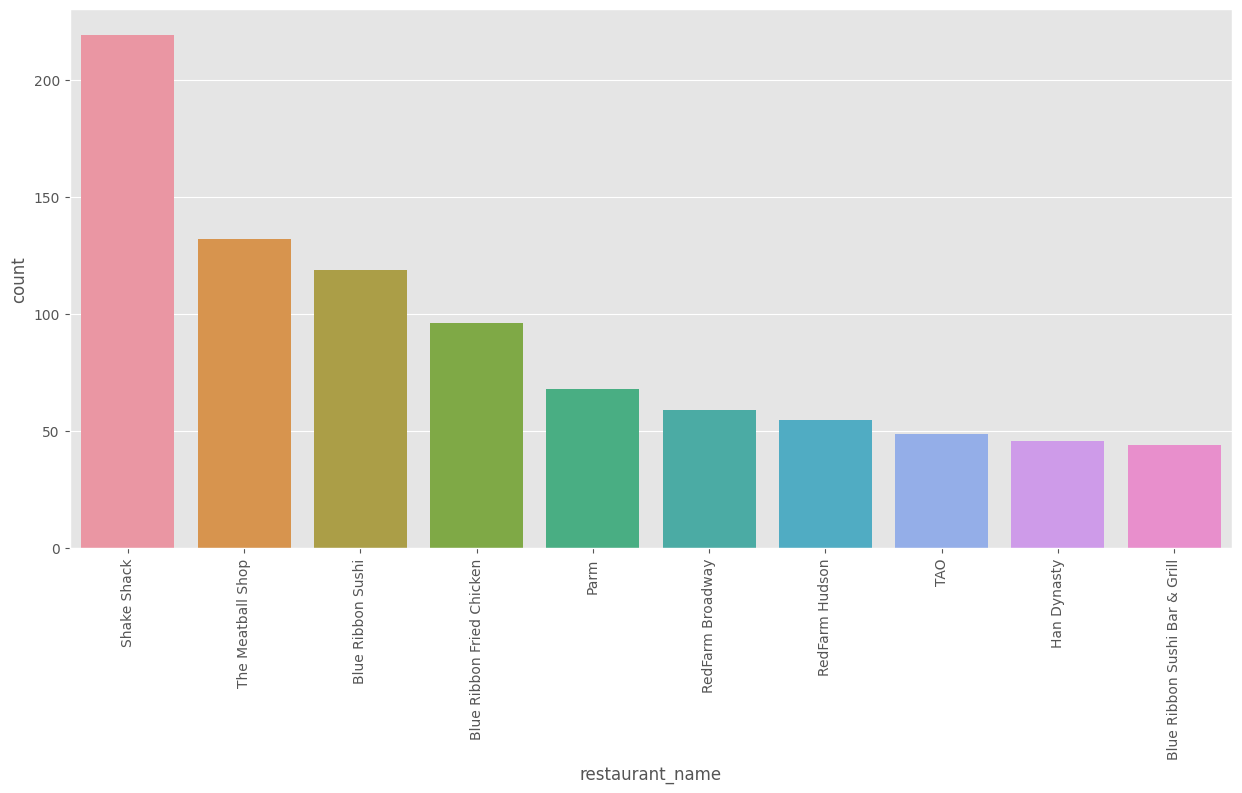

In [ ]:
# creating a bar chart to demonstrate 'restaurant_name' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

#### **Observations:**

*   Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Fried Chicken, and Parm are the most popular restaurants.


### **Cuisine Type**

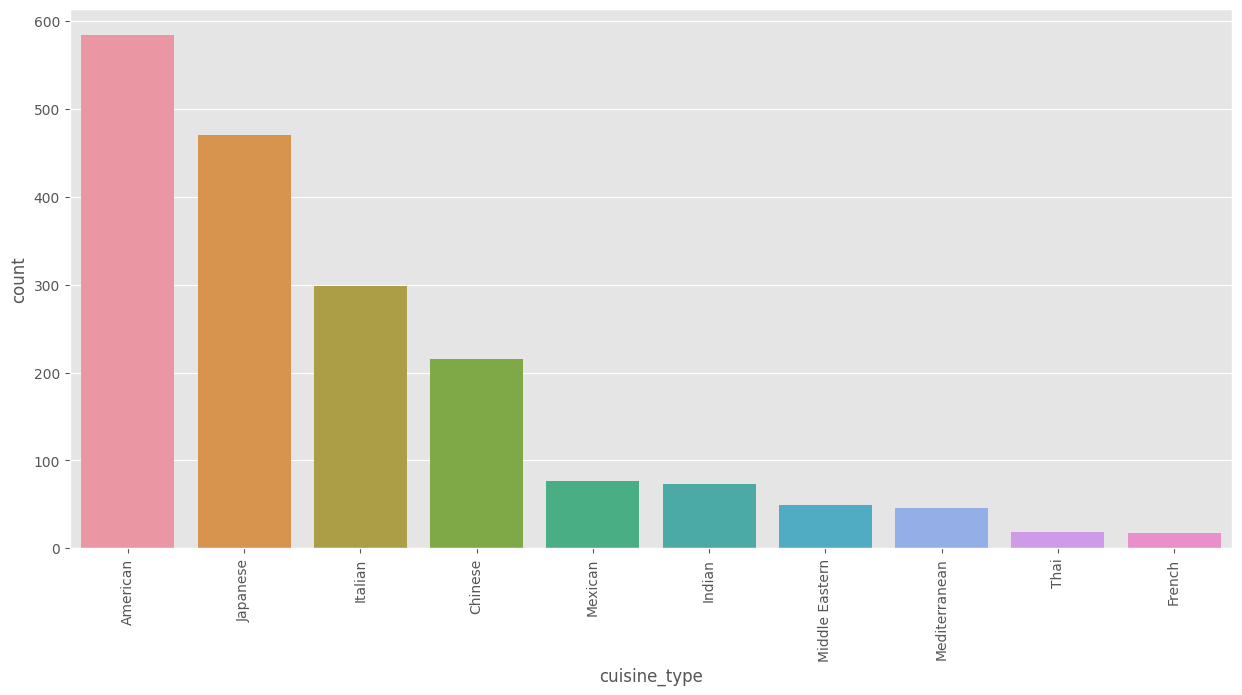

In [ ]:
# creating a bar chart to demonstrate 'cuisine_type' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', order = df.cuisine_type.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

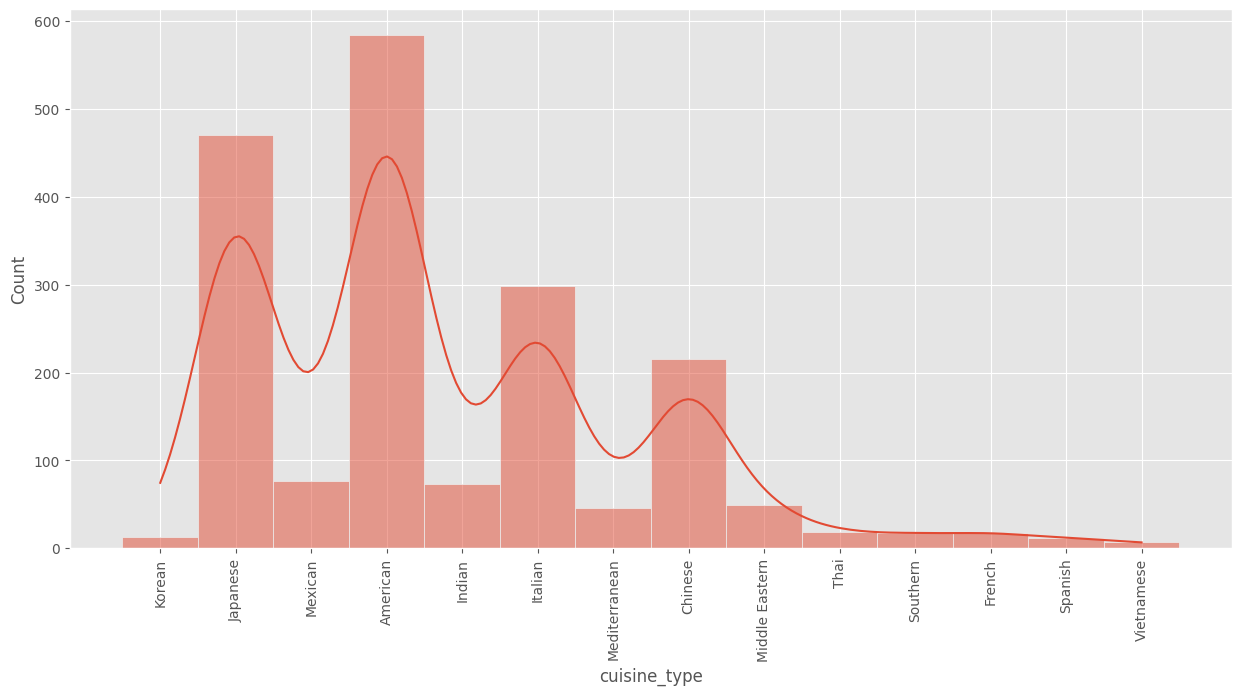

In [ ]:
# creating a histogram for analyzing distribution
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cuisine_type', kde = True)
plt.xticks(rotation = 90)
plt.show()

#### **Observations:**

*  American, Japanese, Italian, Chinese, and Mexican are the top cusine types.

### **Cost of the Order**

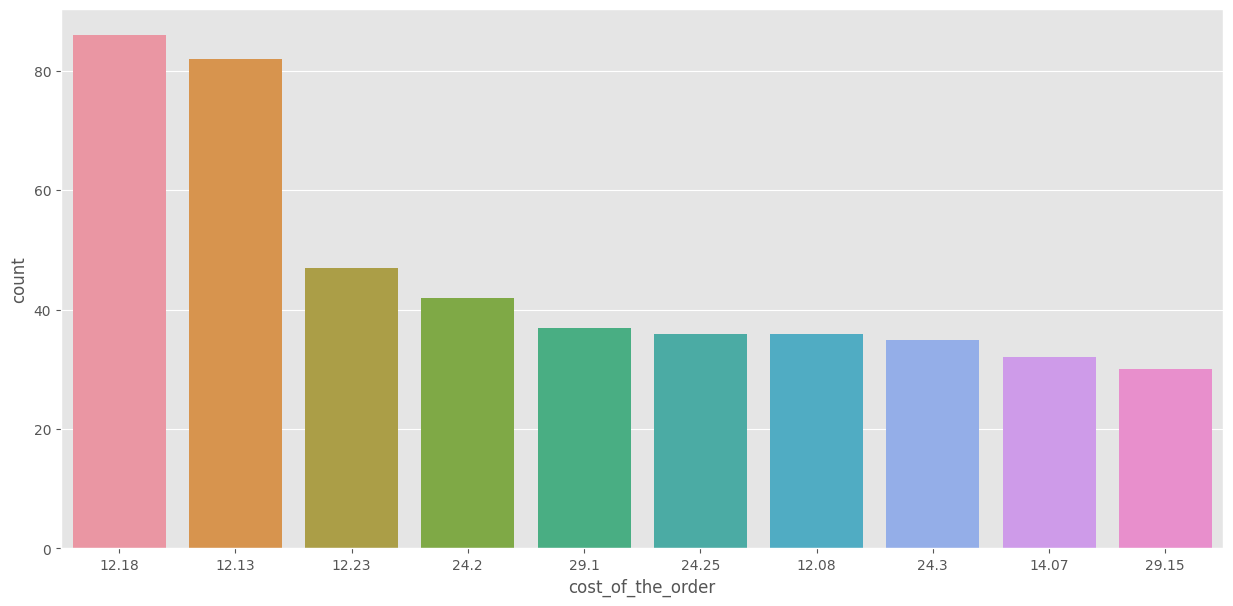

In [ ]:
# creating a bar chart to demonstrate 'cost_of_the_order' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'cost_of_the_order', order = df.cost_of_the_order.value_counts().iloc[:10].index);

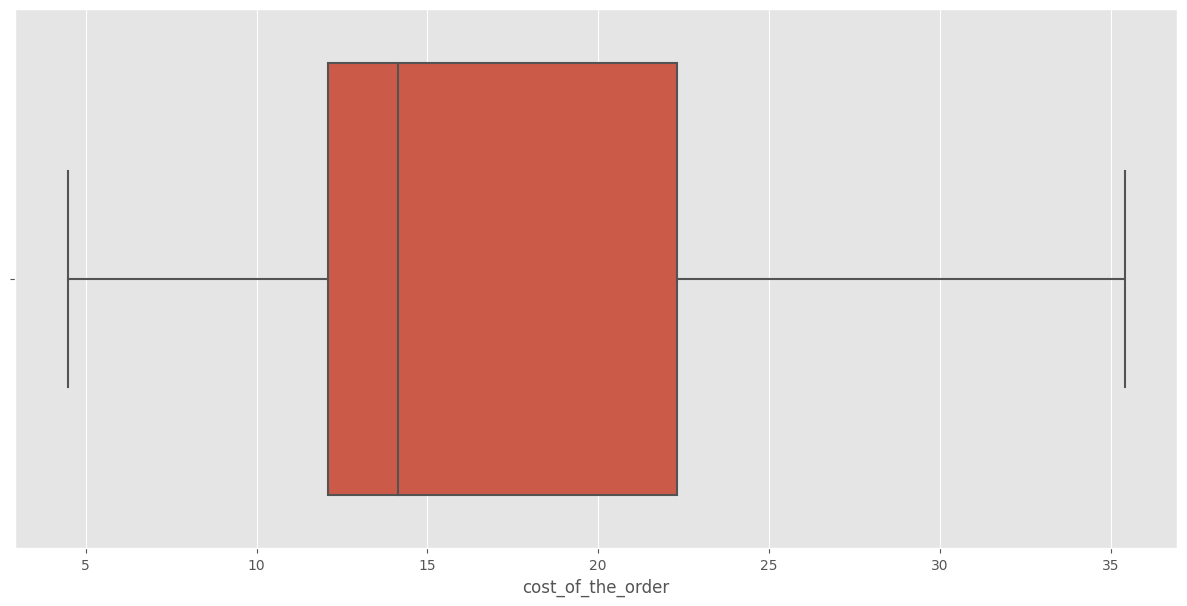

In [ ]:
# creating a boxplot for analyzing distribution
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = 'cost_of_the_order');

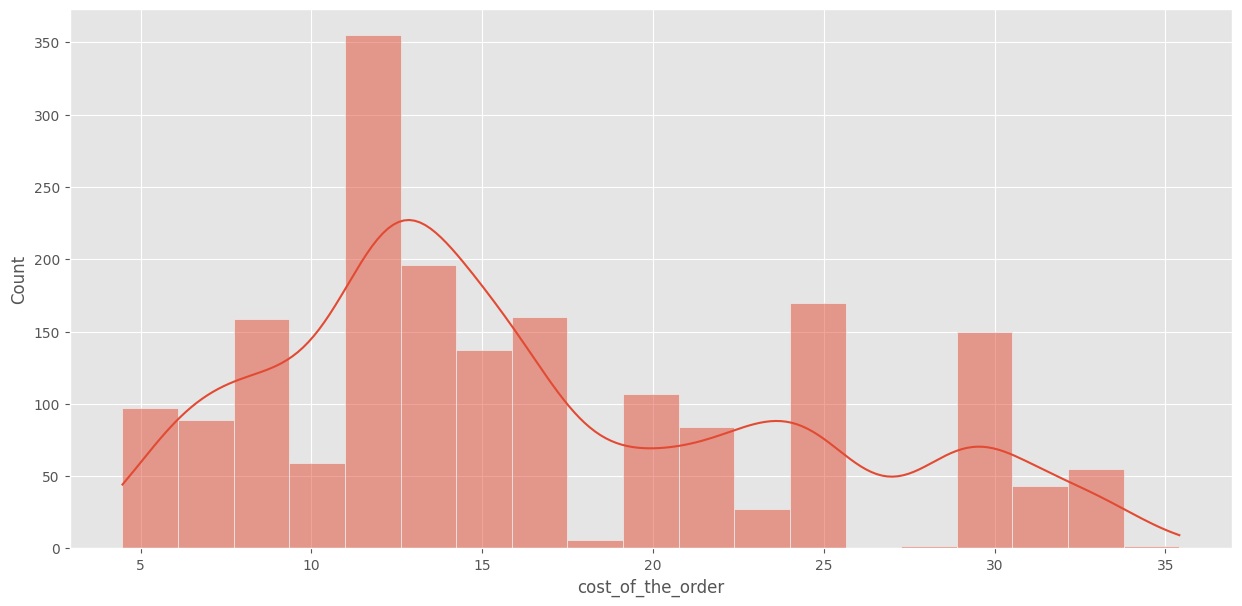

In [ ]:
# creating a histogram for analyzing distribution
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', kde = True);

#### **Observations:**

*   The cost of the order ranges from 12.18 to 29.15 with approximately 14 being the median price.
*   Box plot is right skewed to the cheaper order costs.
*   As demonstrated in the histogram, prices tend to skew towards the left where prices are lower. Hence, order costs are generally cheaper.

### **Day of the Week**

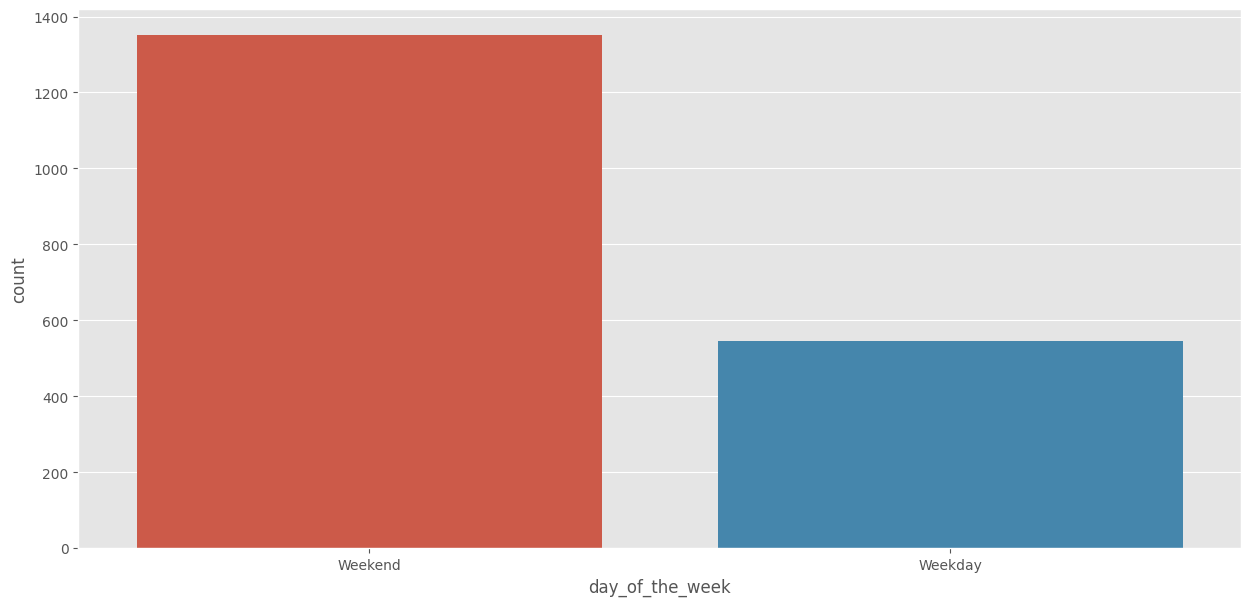

In [ ]:
# creating a bar chart to demonstrate 'day_of_the_week' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'day_of_the_week')
plt.show()

#### **Observations:**

*   The weekend has almost triple the total orders versus the weekday total orders.
*   Customers prefer to order on weekends.




### **Rating**

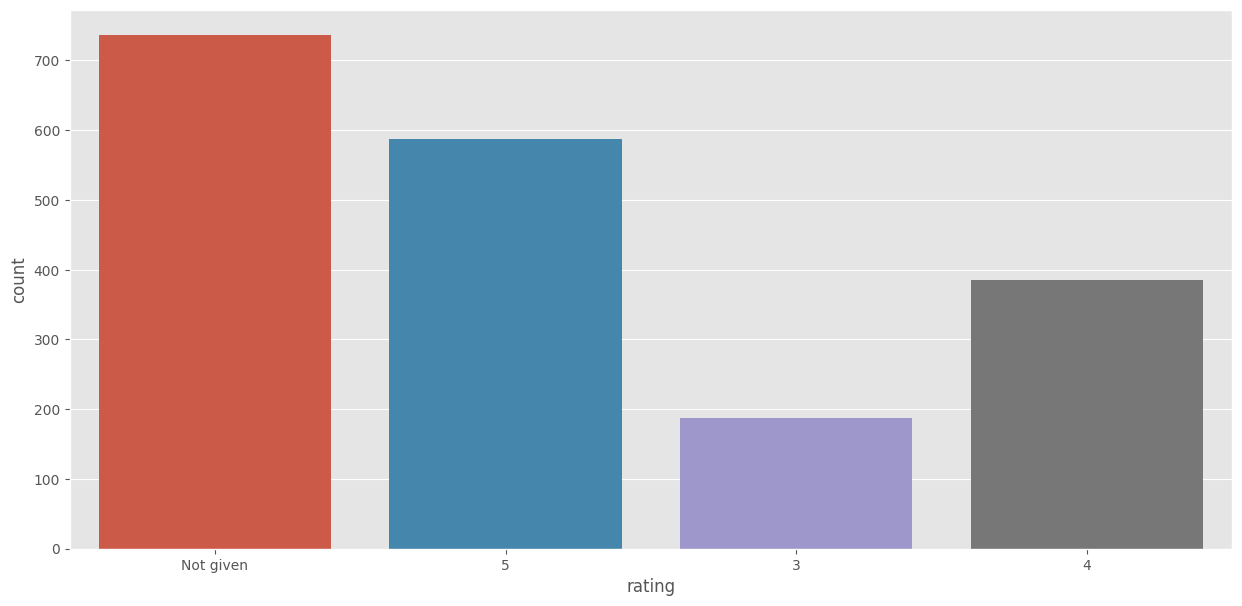

In [ ]:
# creating a bar chart to demonstrate 'rating' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'rating');

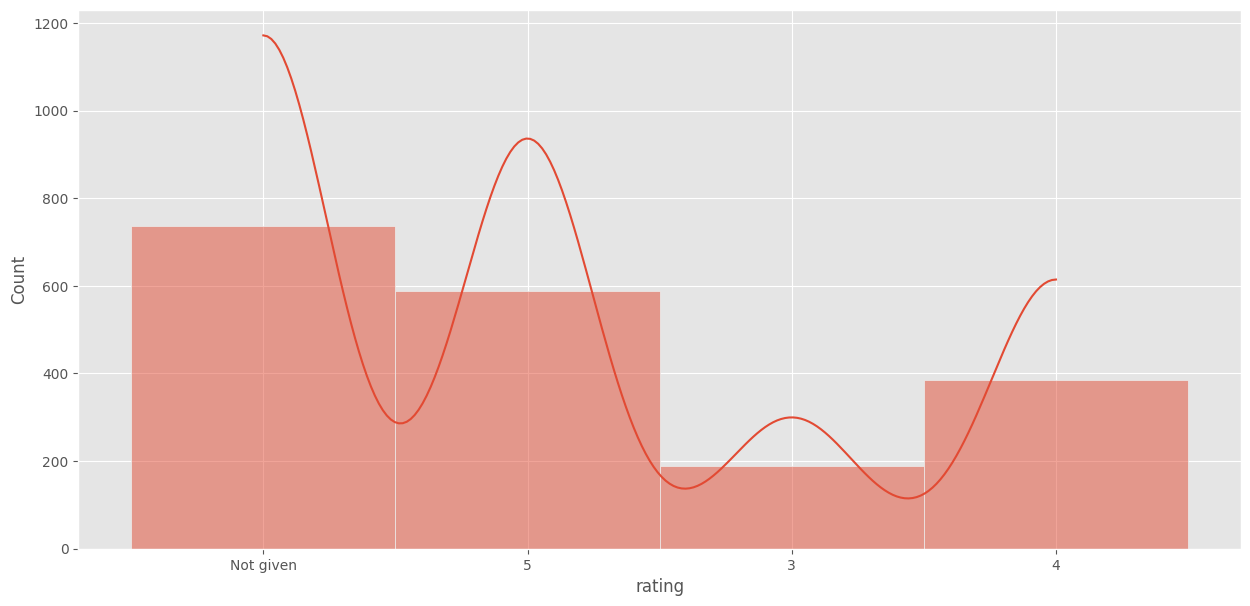

In [ ]:
# creating a histogram for analyzing distribution
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'rating', kde = True);

#### **Observations:**

*   The majority of ratings are missing values as demonstrated with the 'not given' totals.
*   Rating values given are favorable with most being 5/5.

### **Food Preparation Time**

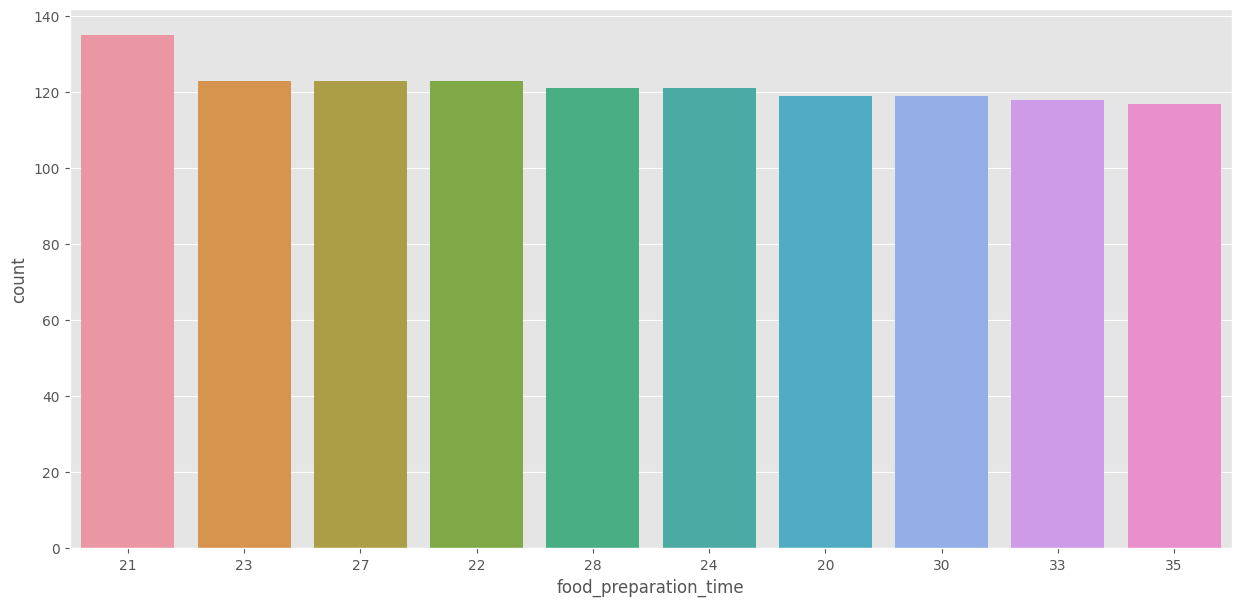

In [ ]:
# creating a bar chart to demonstrate 'food_preparation_time' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'food_preparation_time', order = df.food_preparation_time.value_counts().iloc[:10].index);

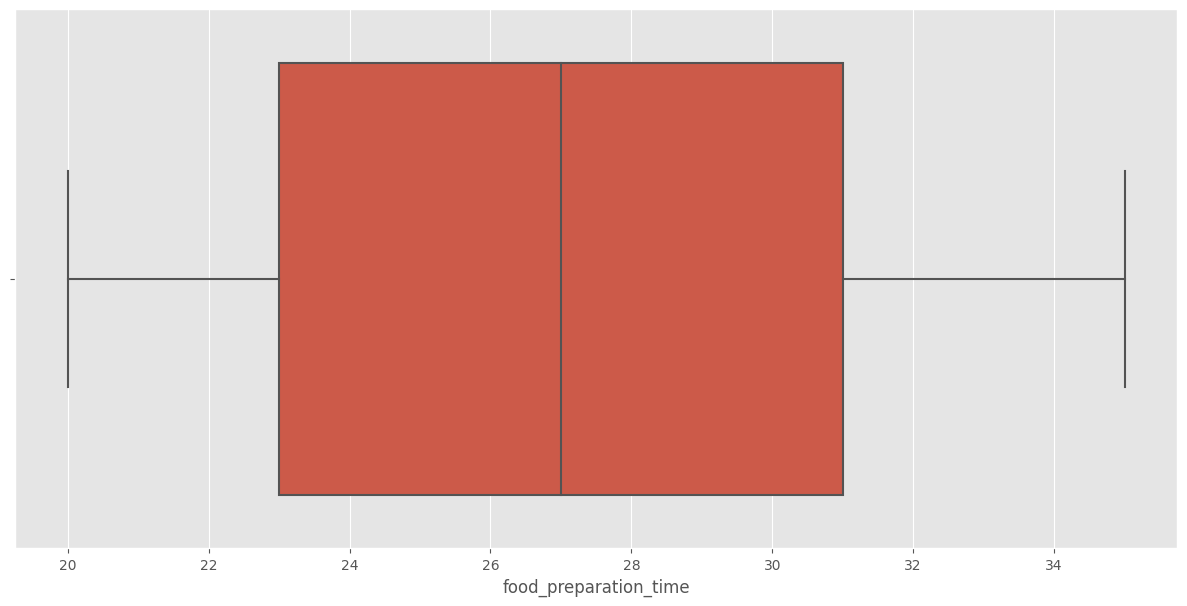

In [ ]:
# creating a boxplot for analyzing distribution
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = 'food_preparation_time');

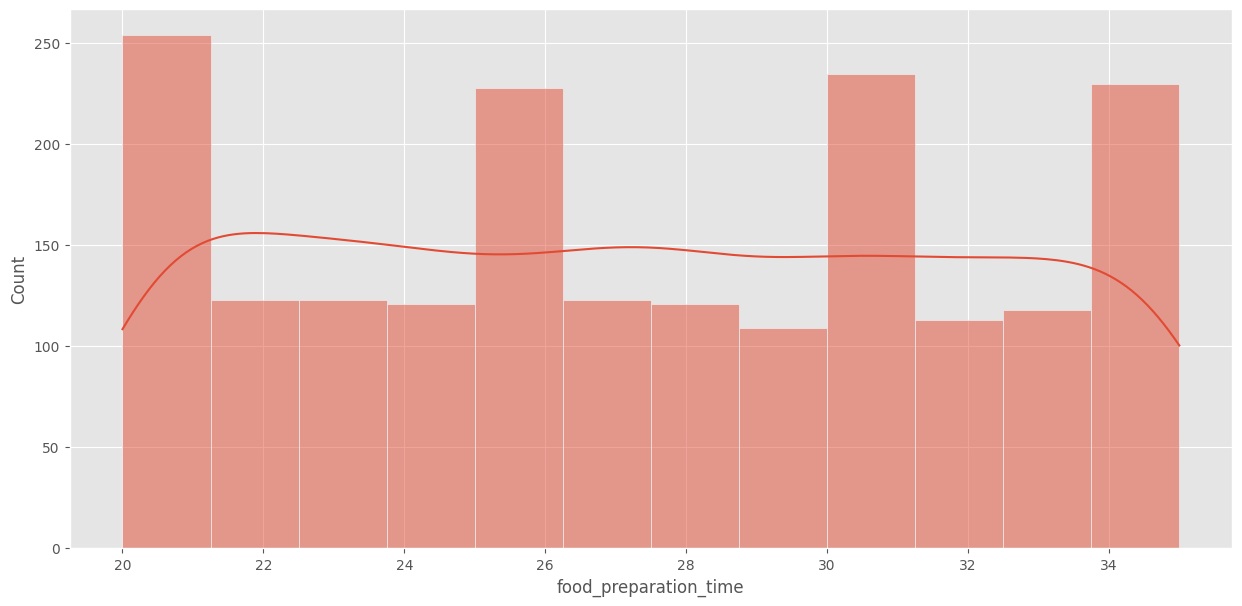

In [ ]:
# creating a histogram for analyzing distribution
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'food_preparation_time', kde = True);

#### **Observations:**

*   Food preparation time typically takes 21 to 35 minutes.
*   The boxplot and the histogram have no skew with a median of 27 minutes.



### **Delivery Time**

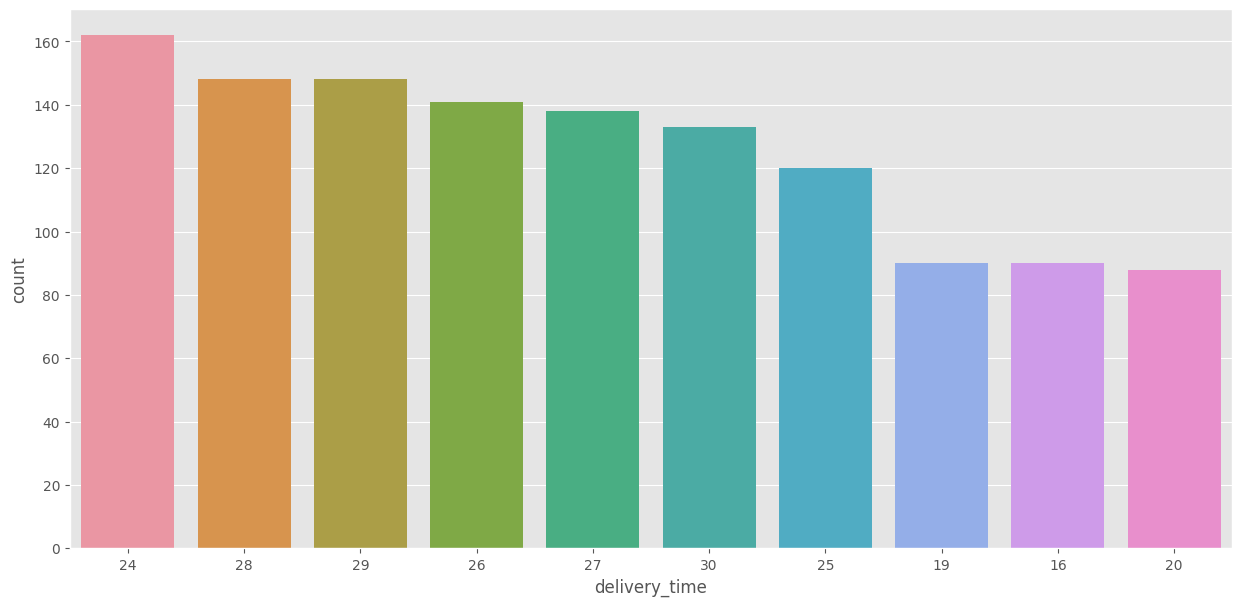

In [ ]:
# creating a bar chart to demonstrate 'delivery_time' distributions
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'delivery_time', order = df.delivery_time.value_counts().iloc[:10].index);

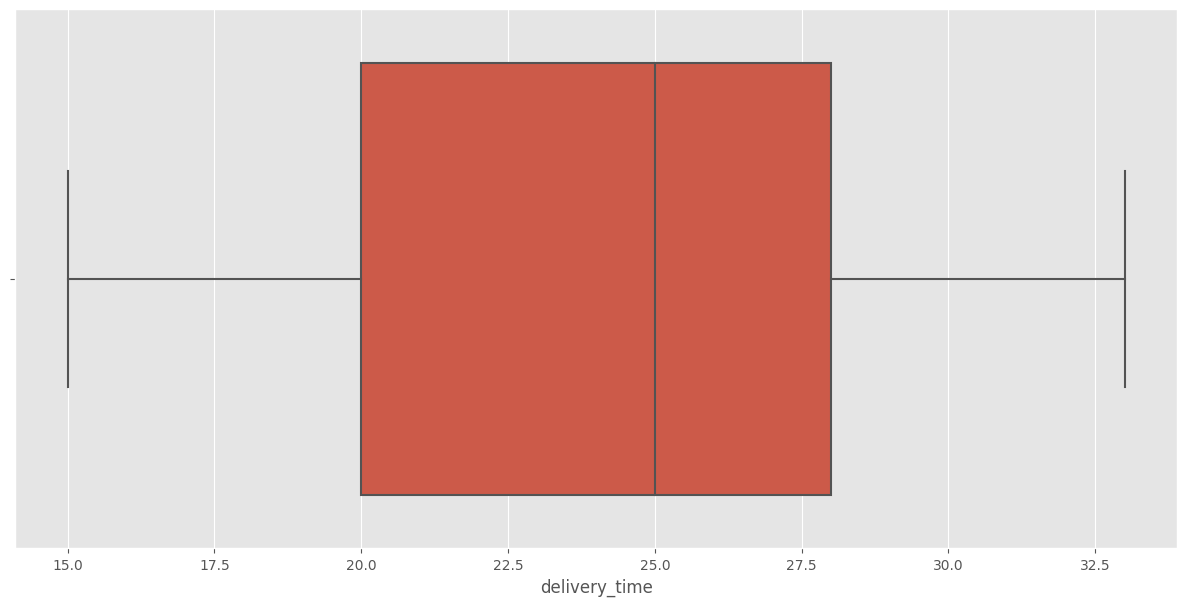

In [ ]:
# creating a boxplot for analyzing distribution
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = 'delivery_time');

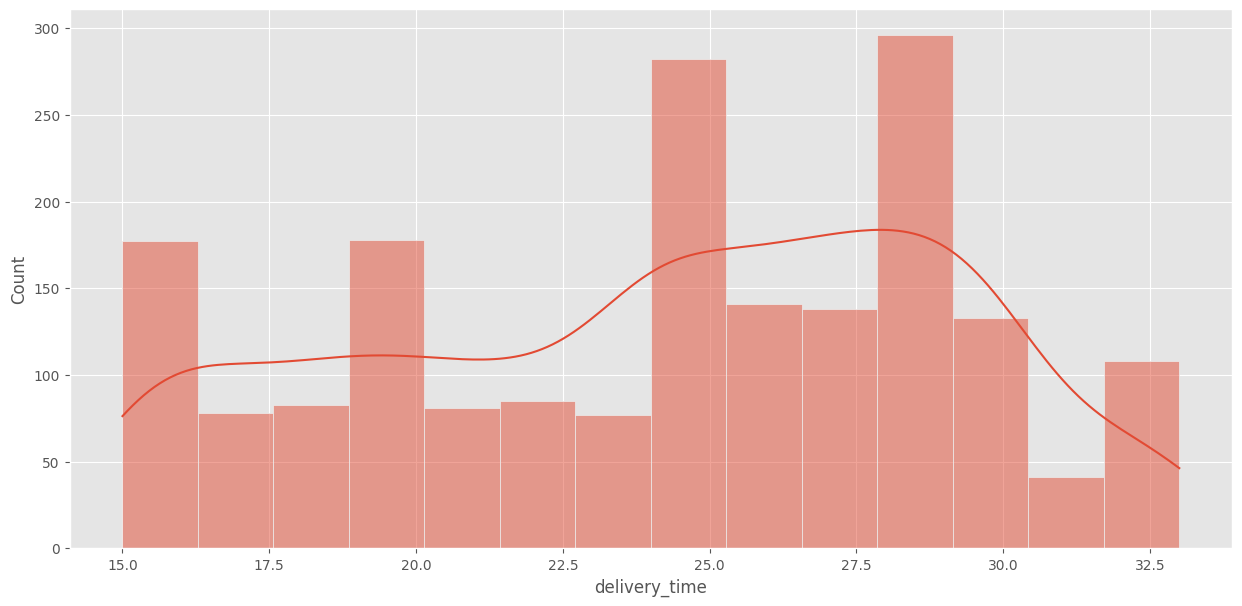

In [ ]:
# creating a histogram for analyzing distribution
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'delivery_time', kde = True);

#### **Observations:**

*   Delivery time ranges from approximately 16 to 29 minutes.
*   The boxplot is left skewed with the median being 25 minutes
*   The histogram is left skewed with delivery times averaging 25 to 28 minute deliveries.




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# totaling how many unique restaurant names there are in the 'restaurant_name' column of the dataframe
# acquiring the top 5 most frequent restaurant names to create the new dataframe
# making a new dataframe with two columns that demonstrate the top 5 restaurants and orders
# pinpointing the top 5 restaurants according to the total number of orders placed
df['restaurant_name'].value_counts().iloc[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### **Observations:**

*   The top 5 restaurants based on total orders received are Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (68).



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# grouping weekday and weekend with cuisine types
# counting total unique cuisine type values within each group
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### **Observations:**

*   The most popular cuisine on weekends is American with 415 total orders.
*   There are 1,351 weekend orders.
*   Approximately 31% of weekend orders are of the American cuisine type.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# calculating the percentage of orders that cost greater than 20 to total orders
# rounding to 2 decimal places
round(len(df[df['cost_of_the_order']>20])/len(df)*100, 2)

29.24

#### **Observations:**

*   Approximately 29.24% of the orders cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# calculating the average delivery time column
# rounding to 2 decimal places
round(df['delivery_time'].mean(),2)

24.16

#### **Observations:**

*   The average order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# counting how many unique customer IDs there are in the 'customer_id' column of the dataframe
# analyzing the top 5 frequent customer IDs to create the new dataframe containing customer ids and orders
df['customer_id'].value_counts().iloc[:5]

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### **Observations:**

*   The top 5 most frequent customers are 52832, 47440, 83287, 250494, and 259341.
*  The number of orders they placed are 13, 10, 9, 8, and 7.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### **Cost of the Order, Food Preparation Time, and Delivery Time**

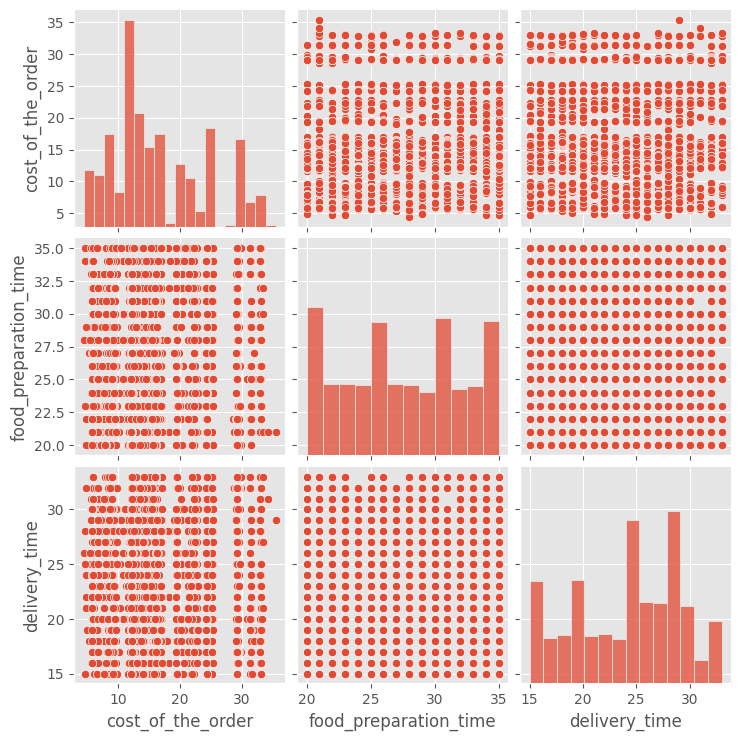

In [ ]:
# creating a pairplot to determine correlation between variables
plt.rcParams['figure.figsize'] = (15,7)
sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]);

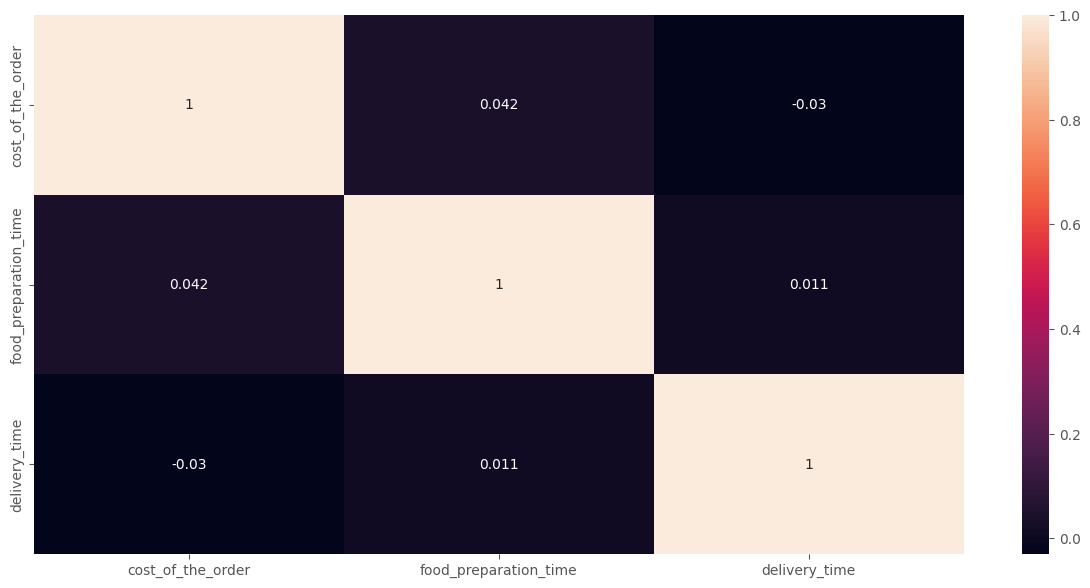

In [ ]:
# creating a heatmap to determine correlation between variables
plt.figure(figsize = (15,7))
sns.heatmap(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot = True);

#### **Observations:**
*   Based on the pairplot and heatmap, the cost_of_the_order, delivery_time, and food_preparation time have a weak correlation.

### **Cost of the Order and Cuisine Type**

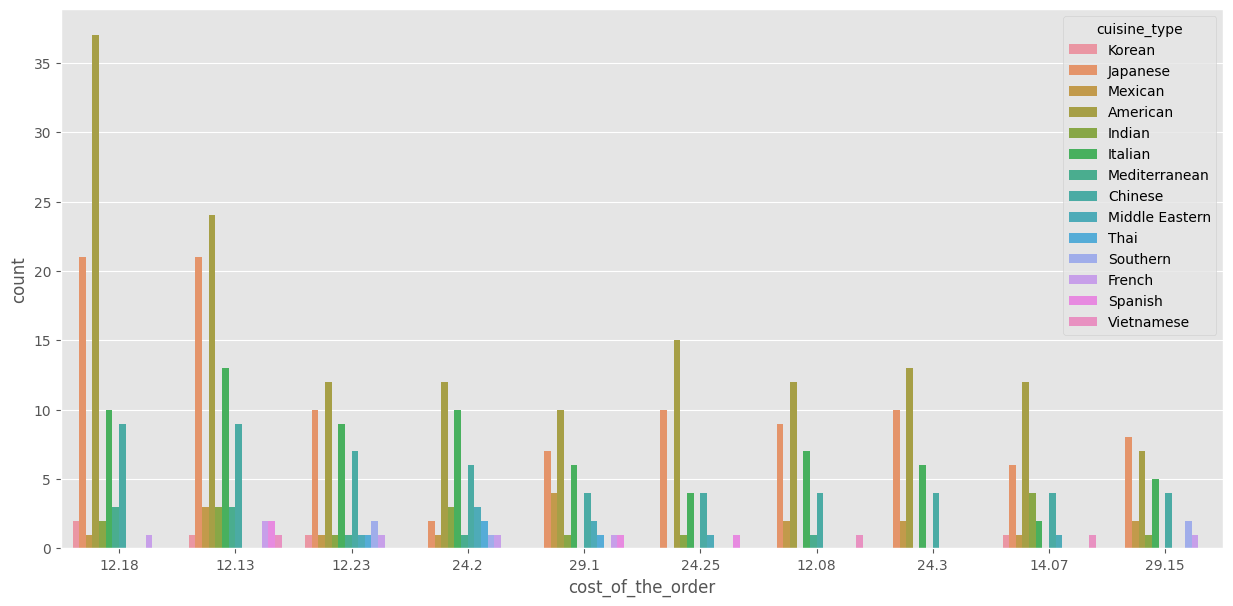

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'cost_of_the_order', hue = 'cuisine_type', order = df.cost_of_the_order.value_counts().iloc[:10].index);

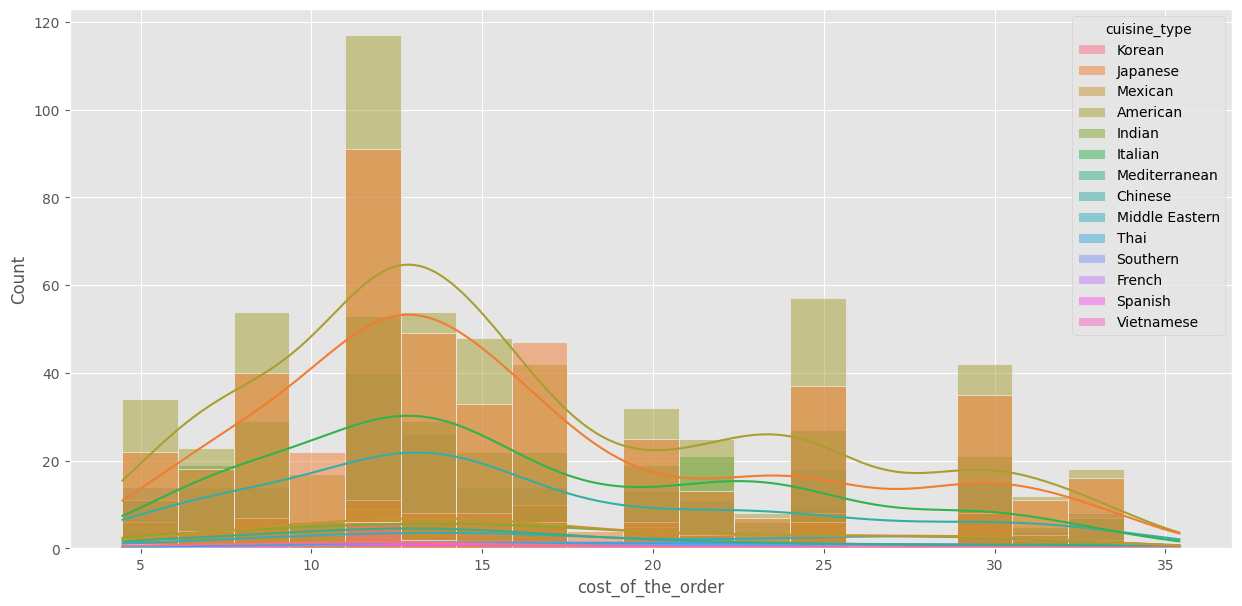

In [ ]:
# creating a histogram to determine correlation between variables
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'cuisine_type', kde = True);

#### **Observations:**

*   Most cuisine type orders costs around 12 dollars.
*   Negative correlation: The lower the price, the greater cuisine type options.





### **Day of the Week and Cuisine Type**

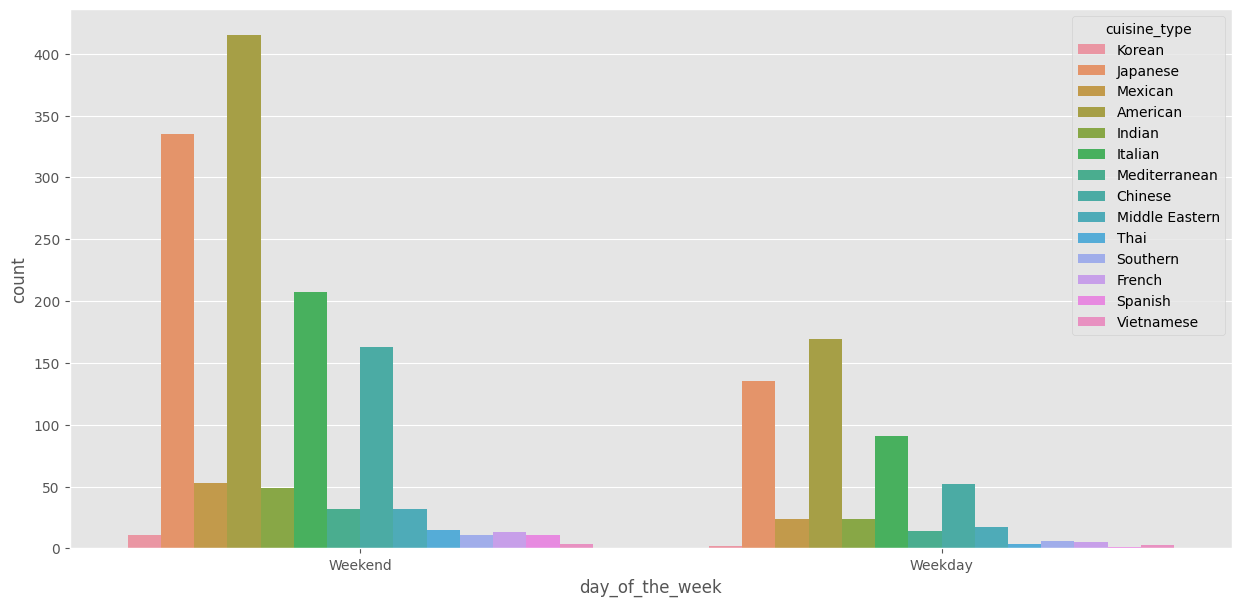

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'day_of_the_week', hue = 'cuisine_type', order = df.day_of_the_week.value_counts().iloc[:10].index);

#### **Observations:**
*   Different cuisine types are ordered more often on weekends than on weekends.

### **Rating and Cuisine Type**

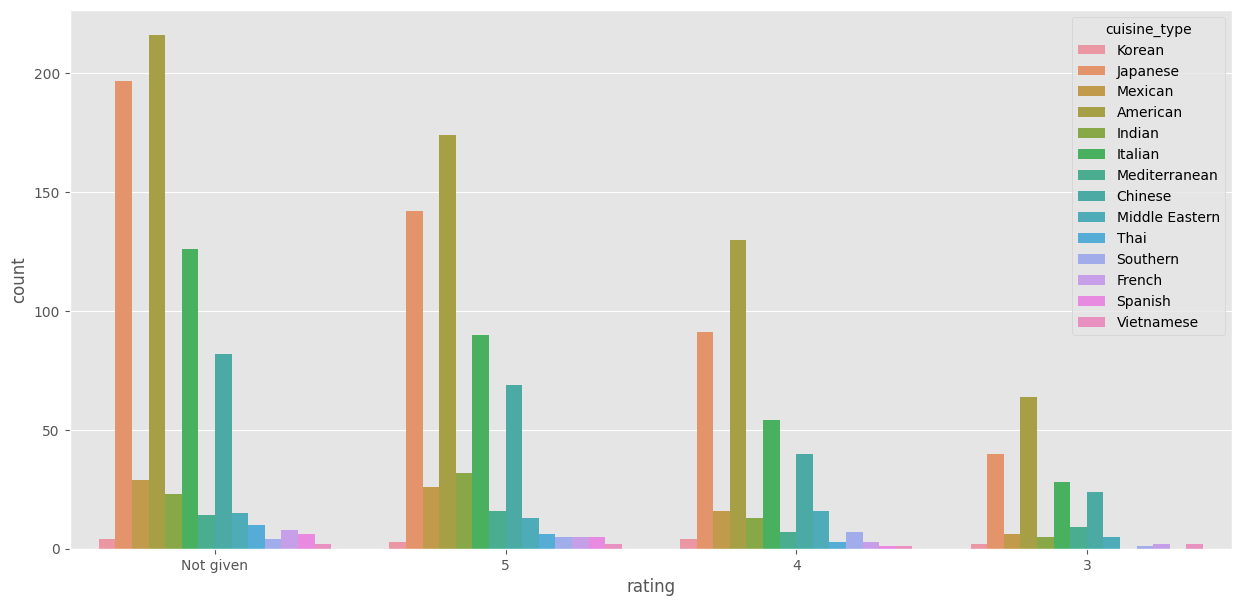

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'rating', hue = 'cuisine_type', order = df.rating.value_counts().iloc[:10].index);

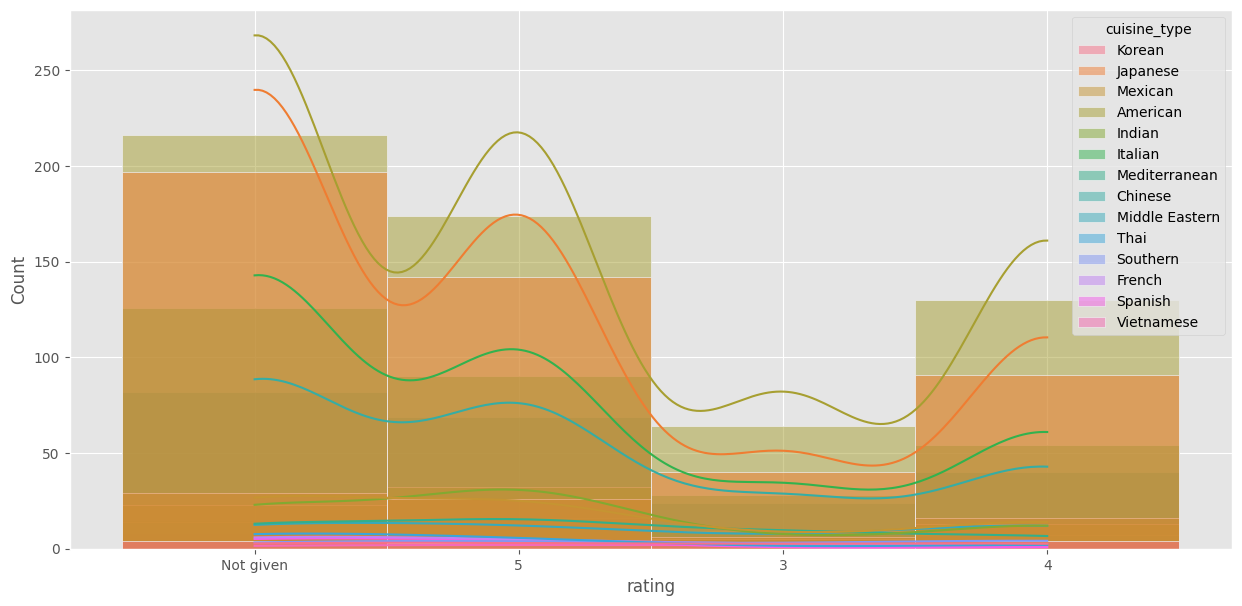

In [ ]:
# creating a histogram to determine correlation between variables
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'rating', hue = 'cuisine_type', kde = True);

#### **Observations:**
*   Majority of ratings are not given.
*   The histogram is left skewed, which is centered on the 'not given' and 5 ratings that hold the greatest rating percentages.

### **Delivery Time and Cuisine Type**

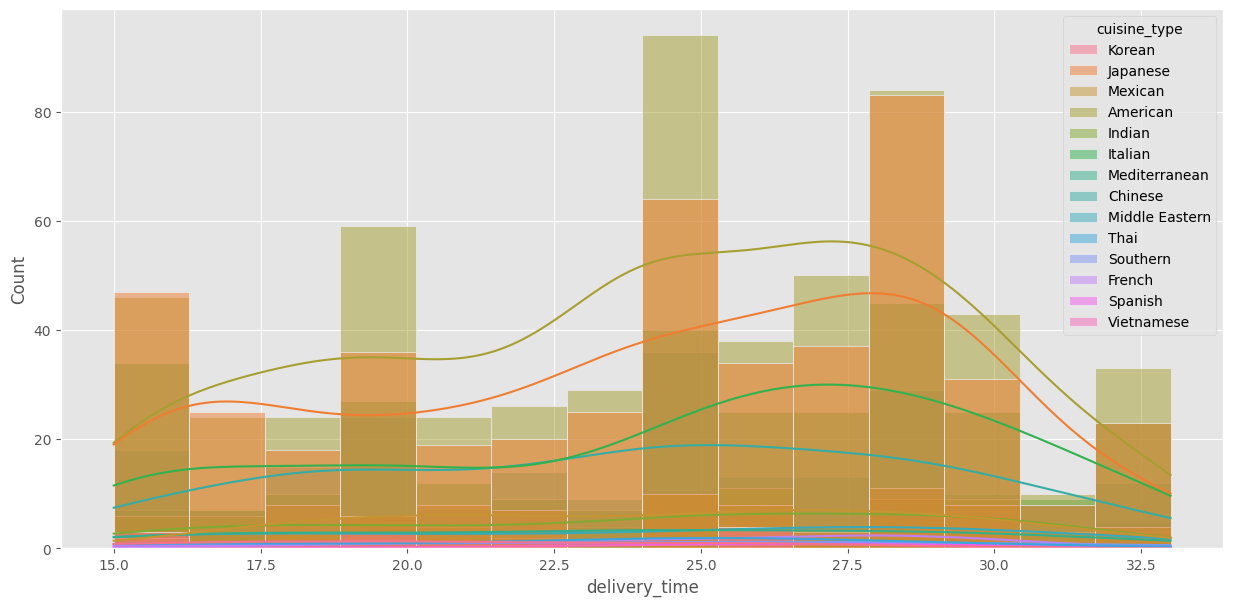

In [ ]:
# creating a histogram to determine correlation between variables
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'delivery_time', hue = 'cuisine_type', kde = True);

#### **Observations:**
*   Most cuisine types such as American and Japanese skew towards the right side in variety as the delivery time increases.

### **Cost of the Order and Day of the Week**

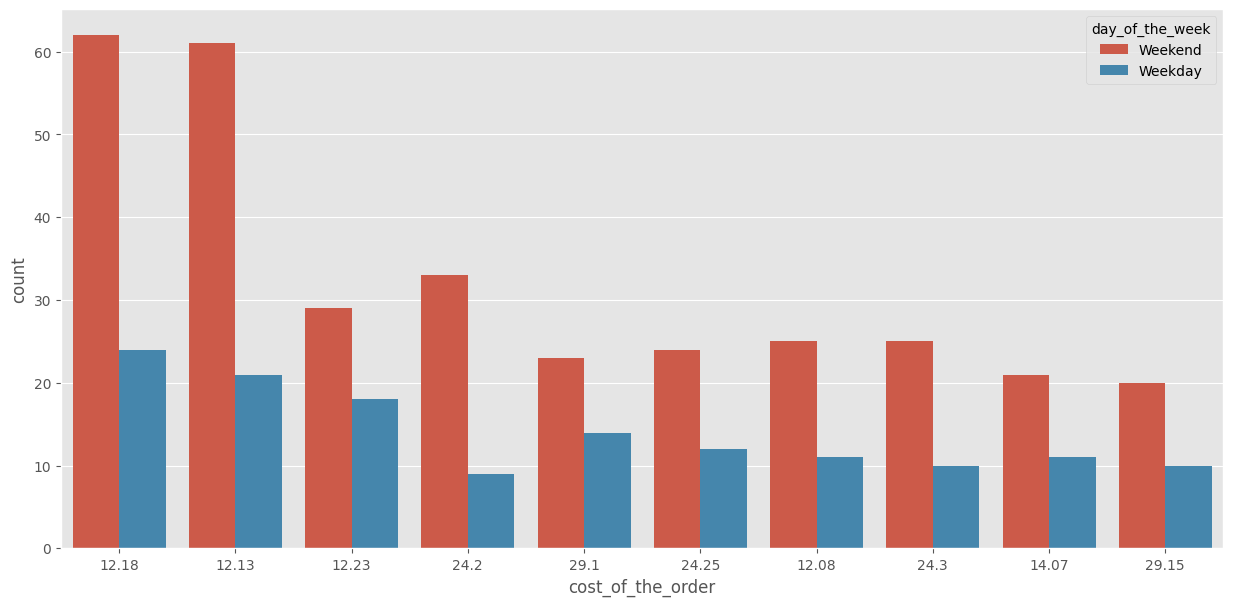

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', order = df.cost_of_the_order.value_counts().iloc[:10].index);

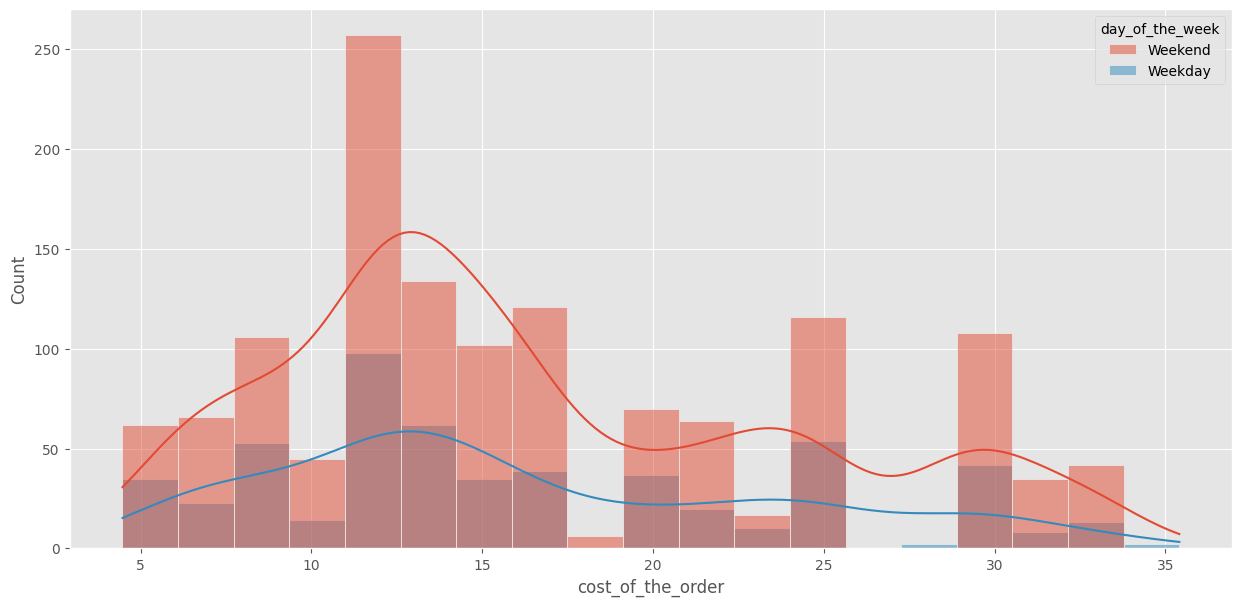

In [ ]:
# creating a histogram to determine correlation between variables
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', kde = True);

#### **Observations:**
*   Both weekends and weekends have low order costs.
*   Histogram is left skewed, which pinpoints to lower prices having the most orders regardless of the day of the week.

### **Cost of the Order and Rating**

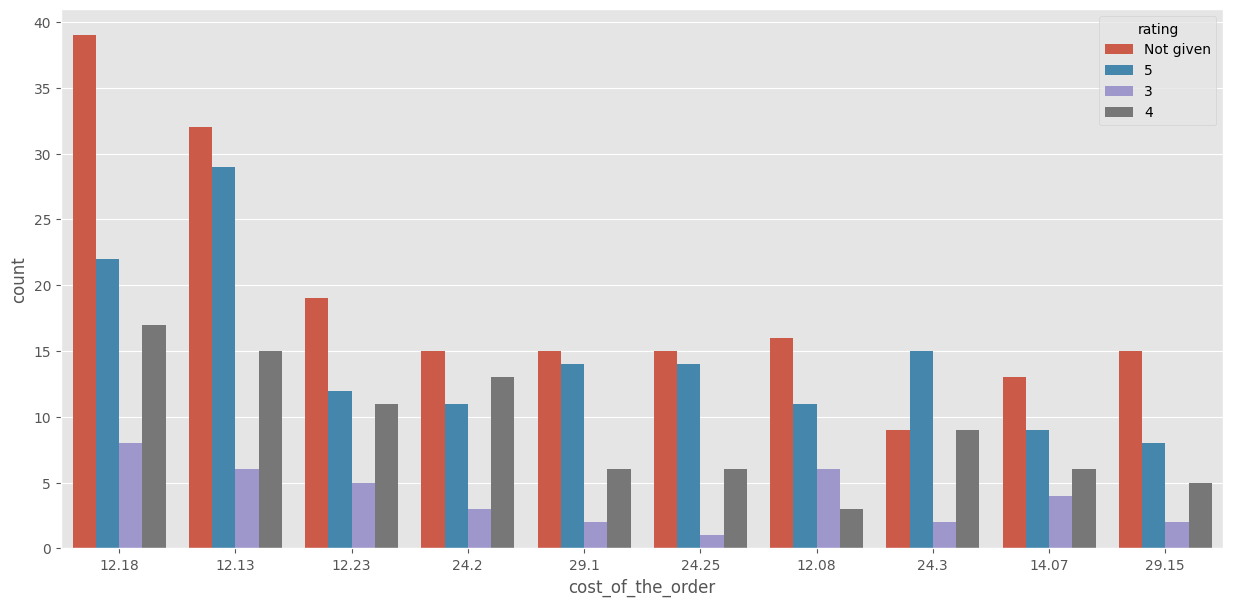

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'cost_of_the_order', hue = 'rating', order = df.cost_of_the_order.value_counts().iloc[:10].index);

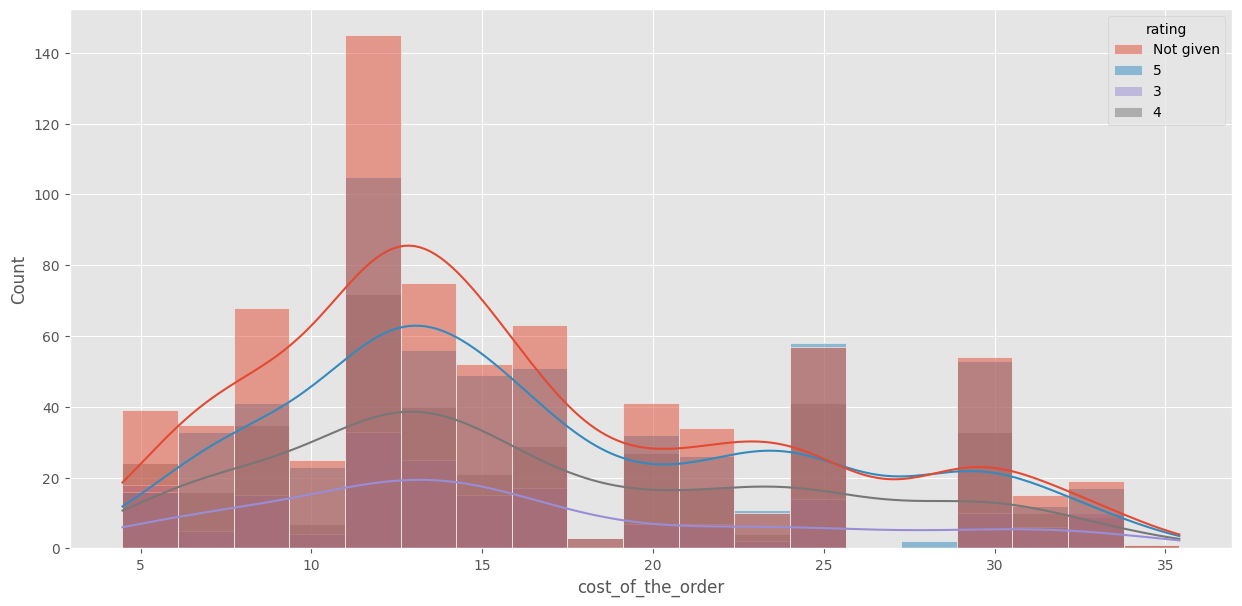

In [ ]:
# creating a histogram to determine correlation between variables
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'rating', kde = True);

#### **Observations:**
*   Histogram: Left skewed: High concentration of 'not given' and '5' ratings with lower order costs
*   Highest order costs see an increase in '4' ratings with '5' mostly remaining the top choice with 'not given' ratings.

### **Day of the Week and Rating**

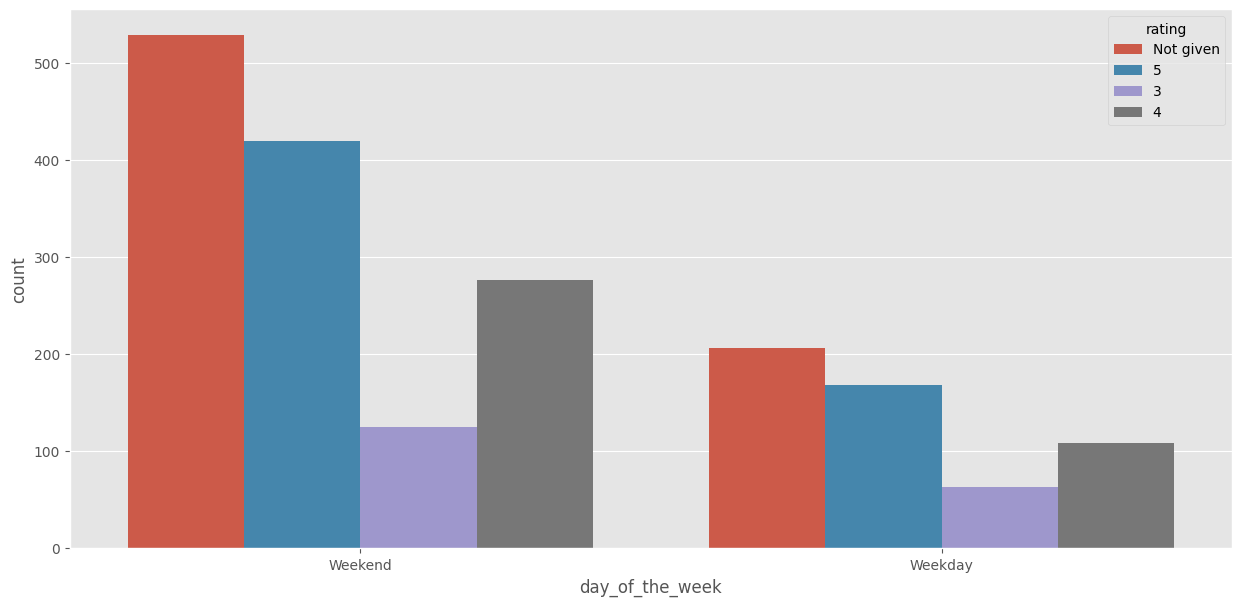

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'day_of_the_week', hue = 'rating', order = df.day_of_the_week.value_counts().iloc[:10].index);

#### **Observations:**
*   Both the weekend and the weekday have the same top ratings in the following order: 'Not given,' '5,' '4,' and '3.'

### **Day of the Week and Food Preparation Time**

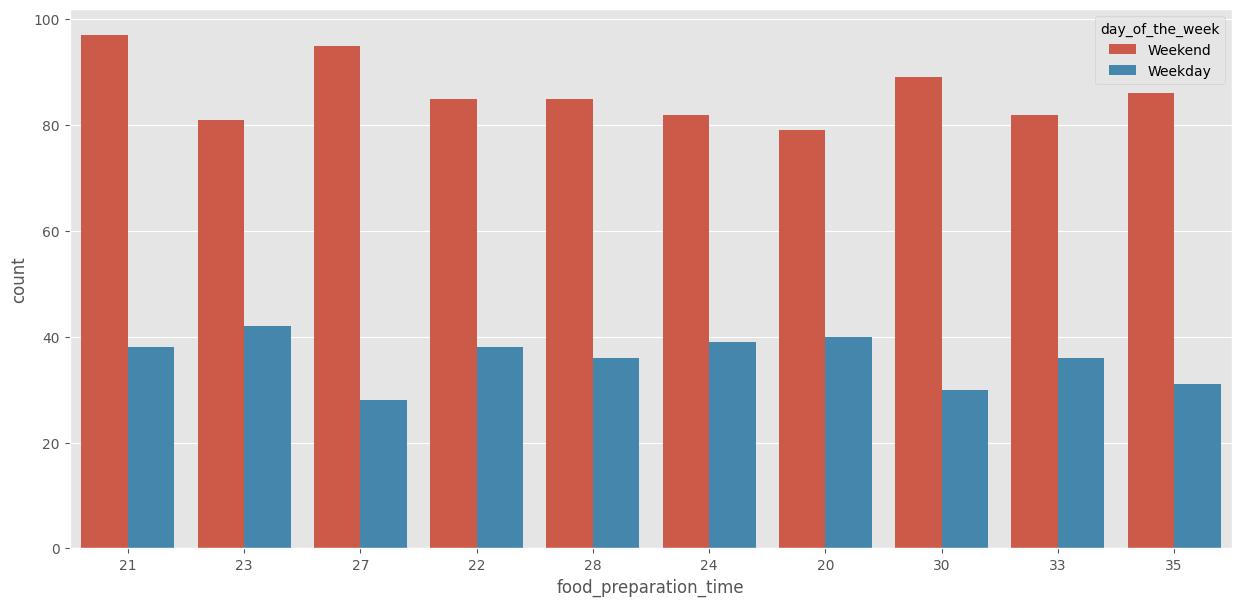

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'food_preparation_time', hue = 'day_of_the_week', order = df.food_preparation_time.value_counts().iloc[:10].index);

#### **Observations:**
*   Most of the food_preparation_time lies within 21-23 minutes on the weekend and weekday.

### **Food Preparation Time and Rating**

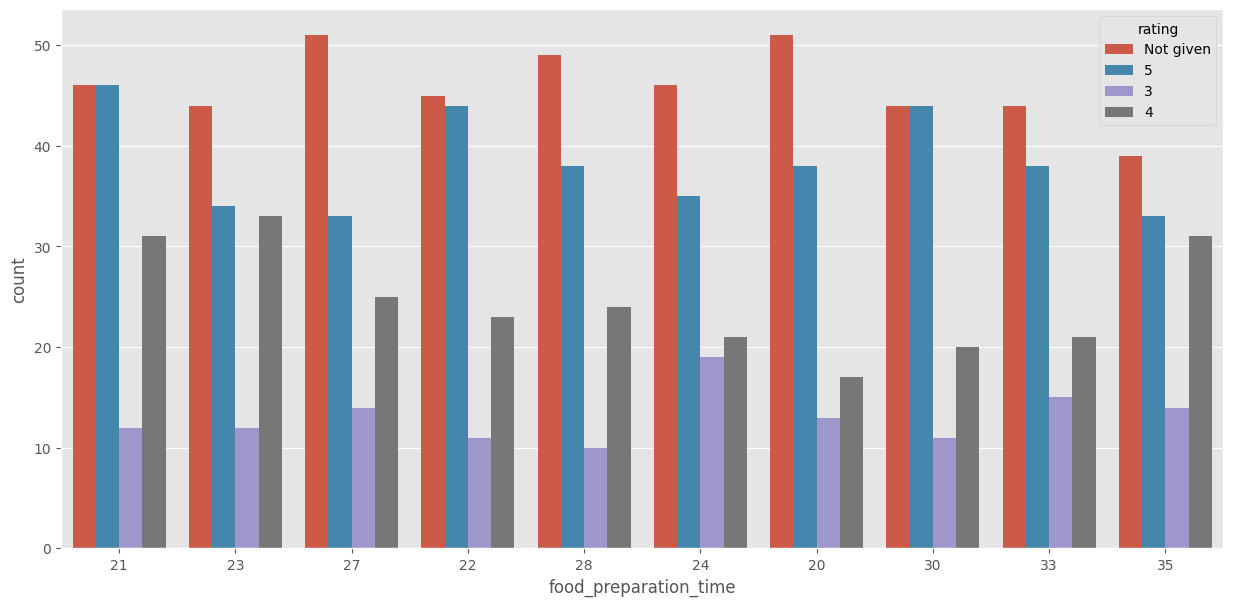

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'food_preparation_time', hue = 'rating', order = df.food_preparation_time.value_counts().iloc[:10].index);

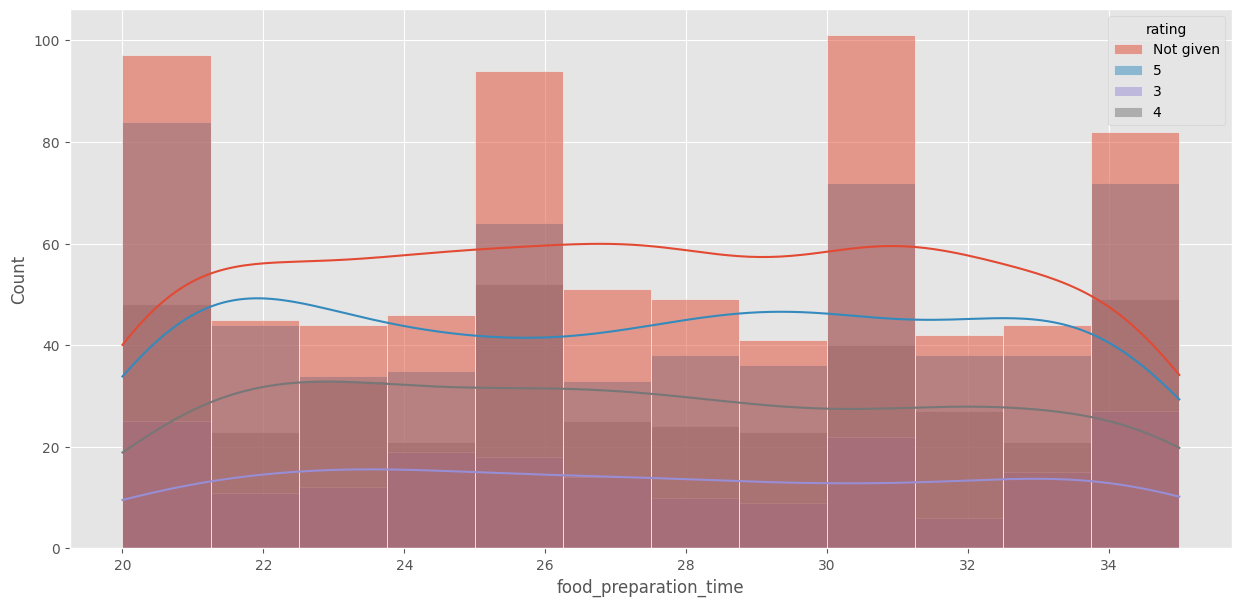

In [ ]:
# creating a histogram to determine correlation between variables
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'food_preparation_time', hue = 'rating', kde = True);

#### **Observations:**
*   There is no correlation between food_preparation_time and rating.

### **Delivery Time and Rating**

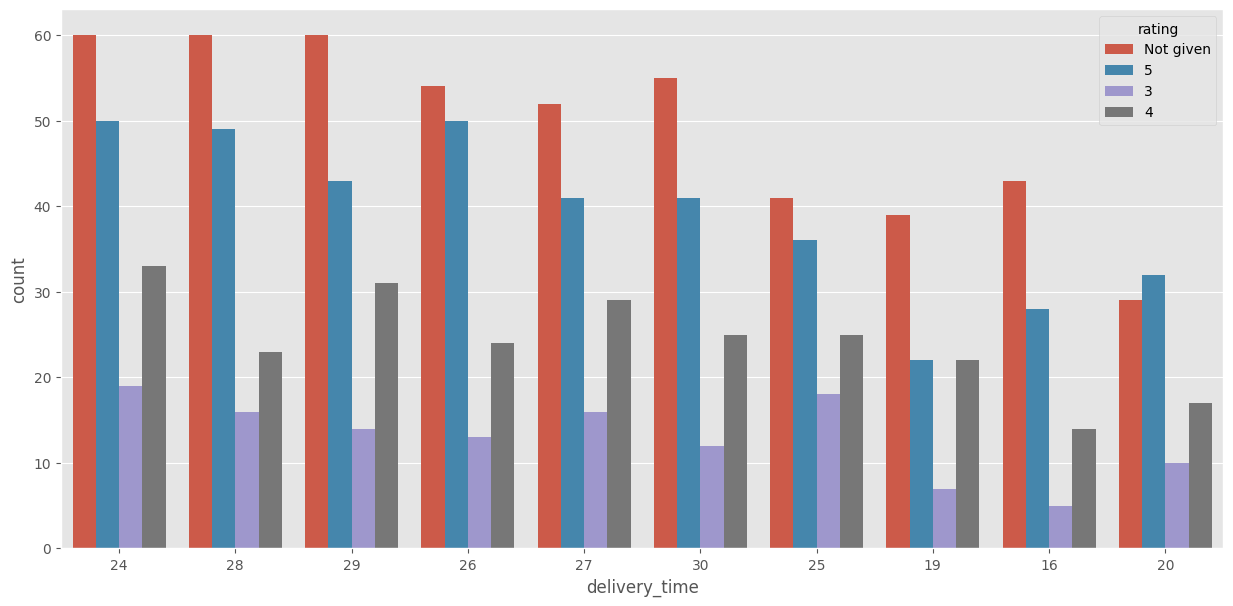

In [ ]:
# creating a countplot to determine correlation between variables
plt.figure (figsize = (15,7))
sns.countplot(data = df, x = 'delivery_time', hue = 'rating', order = df.delivery_time.value_counts().iloc[:10].index);

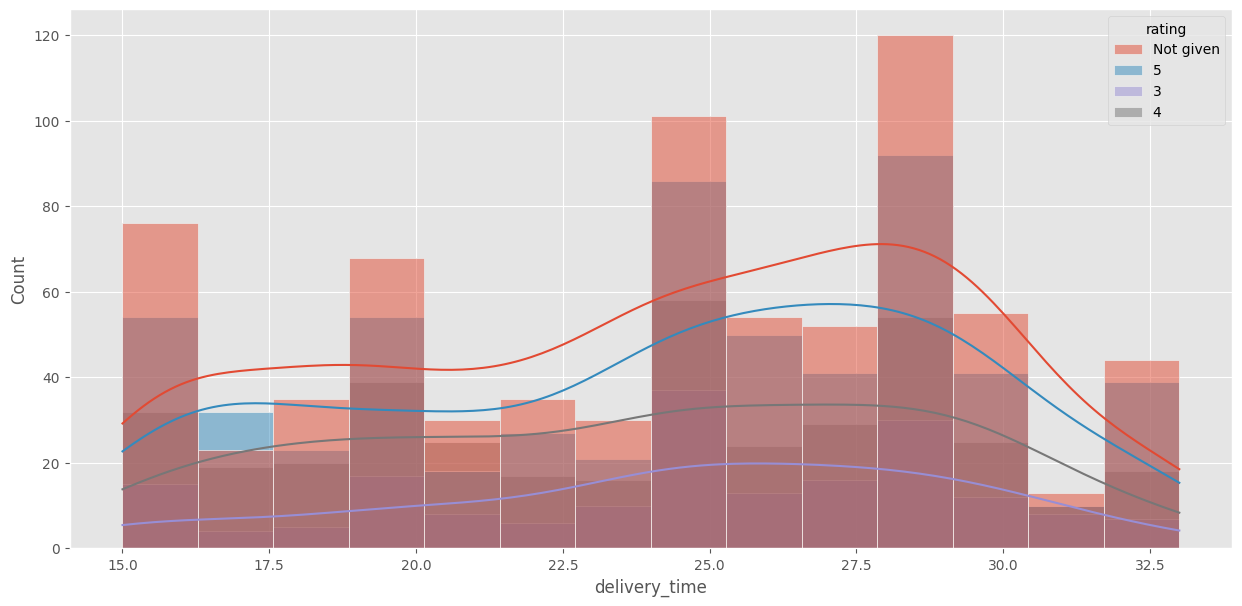

In [ ]:
# creating a histogram to determine correlation between variables
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'delivery_time', hue = 'rating', kde = True);

#### **Observations:**
*   Histogram: Right skewed: As delivery time increases, the 'not given' and '5' ratings increase. Therefore, a positive correlation as also evidenced within the countplot.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# pinpointing what specific ratings are in the data frame
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# replacing the nulls to 'NaN' to represent the missing values
df_clean=df.replace(to_replace = 'Not given', value = np.NaN)
df_clean.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# changing the data type
df_clean['rating'] = df_clean['rating'].astype(dtype = 'float', errors = 'ignore')


In [ ]:
# checking to see if the data type was changed for the 'rating' column
df_clean.info()

RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
# calculating the averages within the grouped by 'restaurant_name' and 'rating' column
avg_rating=df_clean.groupby(['restaurant_name'])['rating'].mean()
avg_rating

restaurant_name
'wichcraft          5.000000
12 Chairs           4.500000
5 Napkin Burger     4.000000
67 Burger           5.000000
Alidoro                  NaN
                      ...   
Zero Otto Nove      4.000000
brgr                3.000000
da Umberto          5.000000
ilili Restaurant    4.153846
indikitch           4.500000
Name: rating, Length: 178, dtype: float64

In [ ]:
# discovering the count of ratings
count_rating=df_clean.groupby(['restaurant_name'])['rating'].count()
count_rating

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating, Length: 178, dtype: int64

In [ ]:
# merging both tables with rating values
all_data = pd.merge(avg_rating, count_rating, how = 'inner', on = avg_rating.index)
all_data

,key_0,rating_x,rating_y
0,'wichcraft,5.000000,1
1,12 Chairs,4.500000,2
2,5 Napkin Burger,4.000000,2
3,67 Burger,5.000000,1
4,Alidoro,NaN,0
...,...,...,...
173,Zero Otto Nove,4.000000,1
174,brgr,3.000000,1
175,da Umberto,5.000000,1
176,ilili Restaurant,4.153846,13


In [ ]:
# replacing the column names
all_data.rename(columns = {'rating_x': 'avg_rating', 'rating_y': 'count_rating'}, inplace = True)

In [ ]:
# checking to see if column names have changed
all_data.head()

,key_0,avg_rating,count_rating
0,'wichcraft,5.0,1
1,12 Chairs,4.5,2
2,5 Napkin Burger,4.0,2
3,67 Burger,5.0,1
4,Alidoro,NaN,0


In [ ]:
# filtering all the data based on average ratings greater than 4 and the count of ratings greater than 50
# rounding to two decimal places
round(all_data[(all_data['avg_rating'] > 4) & (all_data['count_rating'] > 50)], 2)

,key_0,avg_rating,count_rating
20,Blue Ribbon Fried Chicken,4.33,64
21,Blue Ribbon Sushi,4.22,73
136,Shake Shack,4.28,133
153,The Meatball Shop,4.51,84


#### **Observations:**


*   The restaurants fulfilling the criteria to get the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.
*   The average ratings are 4.33, 4.22, 4.28, and 4.51.
*   The count of ratings are 64, 73, 133, and 84.






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# using conditional statements to calculate net revenue
# rounding to two decimal places
net_revenue = 0

for i in df['cost_of_the_order']:
  if i > 20:
    net_revenue = net_revenue+(i*0.25)
  elif 5 < i <20:
    net_revenue = net_revenue+(i*0.15)
  else:
    net_revenue = net_revenue+(i*0)

print(round(net_revenue, 2))

6166.3


#### **Observations:**

*   The net revenue generated is 6166.3 by the company across all orders.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# creating a new column that sums 'food_preparation_time' and 'delivery_time' values
df['total_time'] = df['food_preparation_time']+df['delivery_time']

In [ ]:
# calculating the percentage of the orders greater than 60 minutes
# rounding to two decimal places
round(len(df[df['total_time'] > 60])/len(df), 2)

0.11

#### **Observations:**

*   Approximately 11% of orders take more than 60 minutes to get delivered from the time the order is placed.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# grouping by the 'day_of_the_week' column
# calculating the mean within each group of 'day_of_the_week' and 'delivery_time'
# round to 2 decimal places
round(df.groupby(['day_of_the_week'])['delivery_time'].mean(), 2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

In [ ]:
# subtracting the mean delivery time for the weekday minus the weekend to find out the minute variance
print(28.34 - 22.47)

5.870000000000001


#### **Observations:**


*   The mean delivery time on weekdays is 28.34 minutes and on weekends 22.47 minutes.
*   The mean delivery time of orders varies by 5.87 minutes during weekdays and weekends.



### **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions:**

*   Although the data has no missing values, 39% of order ratings were not given. This large gap within the data affects the validity of total ratings.
*   Reported order ratings were favorable with 31% ratings being a 5/5, 20% of ratings being a 4/5, and 10% of ratings being a 3/5. This implies a large percentage of customer satisfaction.
*   Regardless of the day, American, Japanese, Italian, and Chinese cuisines are most favored by customers.
*   With 851 weekday orders versus 1,351 weekend orders, the weekend has more customers placing orders. This could be due to customers more likely having weekends off of work or school, which allows them time to go out and order food.
*   Only 29.24% of orders cost more than 20 dollars. This implies that there are attractives prices and/or that customers tend to make smaller purchases.
*   The top restaurants where customers place the most orders, such as Shake Shack, Blue Ribbon Fried Chicken, The Meatball Shop, and Blue Ribbon Sushi, also fulfill the company's criteria for getting promotional offers in advertisements. These restaurants are not only popular among consumers but also beneficial for the company itself.
*   It takes 5.87 minutes longer to deliver on weekdays than on weekends. Weekdays average 28.34 minutes and weekends take 22.47 yet customers mostly order on weekends. This may be due to greater traffic due to work or school on the weekdays versus no work or school on weekends.








### **Recommendations:**

*   Ensuring that customers provide ratings of orders for accuracy of the data since 39% of orders were not rated. Revisiting rating data for any mistakes to fill in the missing values may also help decrease the 'not given' total values.
*   Uncover what incentivizes quicker deliveries to customers as order costs increases and preparation time increases. Only 11% of orders take greater than 60 minutes to get delivered upon order placement. However, the mean order delivery time is 24.16 minutes. Try to decrease the delivery time. The quicker the delivery, the more likely a customer is to reorder in the future.
*   Consider adding beef products to increase orders, as meat-centered restaurants like Shake Shack and The Meatball Shop demonstrate a higher favorability with Shake Shack and The Meatball Shop being the top two restaurants where customers order the most.
*   To attract and retain customers, add more American cuisine as it is the most preferred cuisine type regardless of the day of the week. On weekdays, out of a total of 851 orders, 169 orders are for American cuisine (most popular cuisine type). Even on weekends, out of 1,351 orders, 415 orders are for American cuisine.
*   With the top customers ordering 13, 10, 9, 8, 7 times total, look into attracting customer return. How long has the company been keeping track of how frequent a customer returns? If it is long-term, the numbers for top frequenting customers are low. Besides a discount, the company can attract returning customer turnout with a rewards system or coupons for free items on certain days.






---